<a href="https://colab.research.google.com/github/Patris08/Analysis_of_spanish_apartments_-ML/blob/main/Analysis_of_Spanish_apartments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv('pisos.csv')

In [44]:
data

,Unnamed: 0,summary,description,location,photo,price,size,rooms,price/m2,bathrooms,Num Photos,type,region,price_category
2702,2702,summary,description,location,photo,2.0,3.4,3.0,1.2,2.0,18.0,type,region,Low Price
2703,2703,Piso en Avenida de los Huetos,"Amplio piso en Avenida de los Huetos, a la alt...",Zona Rural Noroeste (Vitoria - Gasteiz),https://fotos2.imghs.net/nrd//511613/417936134...,155.0,3.4,2.0,2.2,1.0,16.0,pisos,alava_araba,Medium Price
2704,2704,"Piso en calle de Manuel Iradier, cerca de Call...",Una vivienda para entrar a vivir en pleno cent...,Centro (Vitoria - Gasteiz),https://fotos4.imghs.net/nrd//511613/500878657...,255.0,3.6,3.0,2.4,1.0,10.0,pisos,alava_araba,High Price
2705,2705,"Piso en calle de Manuel Iradier, cerca de Call...",Amplia vivienda en la calle Manuel Iradier de ...,Centro (Vitoria - Gasteiz),https://fotos4.imghs.net/nrd//1005/075/1005_96...,275.0,3.4,4.0,2.4,2.0,22.0,pisos,alava_araba,High Price
2706,2706,Ático en calle de Iturgana,Bonita vivienda tipo duplex para entrar a vivi...,Zona Rural Noroeste (Vitoria - Gasteiz),https://fotos3.imghs.net/nrd//1005/075/1005_75...,255.0,3.6,3.0,2.4,2.0,35.0,pisos,alava_araba,High Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29749,29760,Piso en Centro-Zona Playas,"Piso en Chipiona zona Playa de Regla, 71 m. de...",Centro-Zona Playas (Chipiona),https://fotos5.imghs.net/nrd//1005/845/1005_83...,160.0,3.2,3.0,2.4,1.0,15.0,pisos,cadiz,Medium Price
29750,29761,"Casa en calle de Carlos V, nº 27","Campaña ""Te devolvemos la diferencia"". Si la v...",Núcleo Urbano (Chiclana de la Frontera),https://fotos2.imghs.net/nrd/1070/782/1070_AS1...,99.0,2.6,4.0,1.8,2.0,18.0,pisos,cadiz,Low Price
29751,29762,Dúplex en Playa La Forestal,Estupendo unifamiliar duplex con sotano a 3 mi...,Bahía de la Luz-La Forestal (Rota),https://fotos1.imghs.net/nrd/1094/761/1094_NG2...,313.5,3.2,4.0,2.4,3.0,11.0,pisos,cadiz,High Price
29752,29763,"Piso en calle Puerta del Sol, 26","Campaña ""te devolvemos la diferencia"". Si la v...",Sur (Jerez de la Frontera),https://fotos2.imghs.net/nrd/1070/930/1070_AS1...,52.7,3.0,4.0,1.2,2.0,16.0,pisos,cadiz,Low Price


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29754 entries, 0 to 29753
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   29754 non-null  int64 
 1   summary      29754 non-null  object
 2   description  27024 non-null  object
 3   location     29738 non-null  object
 4   photo        29725 non-null  object
 5   recomendado  2436 non-null   object
 6   price        29738 non-null  object
 7   size         29737 non-null  object
 8   rooms        29045 non-null  object
 9   price/m2     28390 non-null  object
 10  bathrooms    28993 non-null  object
 11  Num Photos   29737 non-null  object
 12  type         29737 non-null  object
 13  region       29721 non-null  object
dtypes: int64(1), object(13)
memory usage: 3.2+ MB


In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
summary,0
description,2730
location,16
photo,29
recomendado,27318
price,16
size,17
rooms,709
price/m2,1364


In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Unnamed: 0      0.000000
summary         0.000000
description     9.175237
location        0.053774
photo           0.097466
recomendado    91.812865
price           0.053774
size            0.057135
rooms           2.382873
price/m2        4.584258
bathrooms       2.557639
Num Photos      0.057135
type            0.057135
region          0.110909
dtype: float64


In [22]:
import re
def extract_price(price_str):
  if isinstance(price_str, str):
    price_str = re.sub(r'[^\d.]', '', price_str)
    try:
      return float(price_str)
    except ValueError:
      return None
  return price_str
print(data.columns)
print(data.price)

data['price'] = data['price'].apply(extract_price)

print("Sample values in the 'price' column:")
print(data['price'].head())

Index(['Unnamed: 0', 'summary', 'description', 'location', 'photo', 'price',
       'size', 'rooms', 'price/m2', 'bathrooms', 'Num Photos', 'type',
       'region'],
      dtype='object')
2702       2.0
2703     155.0
2704     255.0
2705     275.0
2706     255.0
         ...  
29749    160.0
29750     99.0
29751    313.5
29752     52.7
29753     67.0
Name: price, Length: 27024, dtype: float64
Sample values in the 'price' column:
2702      2.0
2703    155.0
2704    255.0
2705    275.0
2706    255.0
Name: price, dtype: float64


In [32]:
from sklearn.impute import KNNImputer

data = data.dropna(subset=['description'])

data['price/m2'] = pd.to_numeric(data['price/m2'], errors='coerce')
data['rooms'] = pd.to_numeric(data['rooms'], errors='coerce')
data['bathrooms'] = pd.to_numeric(data['bathrooms'], errors='coerce')
data['size'] = pd.to_numeric(data['size'], errors='coerce')
data['Num Photos'] = pd.to_numeric(data['Num Photos'], errors='coerce')

data['price'] = data['price'].fillna(data['price/m2'].median())
data['rooms'].fillna(data['rooms'].median())
data['bathrooms'].fillna(data['bathrooms'].median())

data['location'] = data['location'].fillna(data['location'].mode()[0])
data['photo'] = data['photo'].fillna(data['photo'].mode()[0])
data['Num Photos'] = data['Num Photos'].fillna(data['Num Photos'].median())
data['type'] = data['type'].fillna(data['type'].mode()[0])
data['region'] = data['region'].fillna(data['region'].mode()[0])


if 'recomendado' in data.columns:
    data = data.drop(columns=['recomendado'])
    print("'recomendado' column has been removed.")
else:
    print("'recomendado' not found in columns.")

imputer = KNNImputer(n_neighbors=5)
data[['price/m2', 'price', 'size']] = imputer.fit_transform(data[['price/m2', 'price', 'size']])

data.to_csv('processed_data.csv', index=False)

print(data.isnull().sum())

'recomendado' not found in columns.
Unnamed: 0     0
summary        0
description    0
location       0
photo          0
price          0
size           0
rooms          0
price/m2       0
bathrooms      0
Num Photos     0
type           0
region         0
dtype: int64


In [31]:
data

,Unnamed: 0,summary,description,location,photo,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
2702,2702,summary,description,location,photo,2.0,3.4,3.0,1.2,2.0,18.0,type,region
2703,2703,Piso en Avenida de los Huetos,"Amplio piso en Avenida de los Huetos, a la alt...",Zona Rural Noroeste (Vitoria - Gasteiz),https://fotos2.imghs.net/nrd//511613/417936134...,155.0,3.4,2.0,2.2,1.0,16.0,pisos,alava_araba
2704,2704,"Piso en calle de Manuel Iradier, cerca de Call...",Una vivienda para entrar a vivir en pleno cent...,Centro (Vitoria - Gasteiz),https://fotos4.imghs.net/nrd//511613/500878657...,255.0,3.6,3.0,2.4,1.0,10.0,pisos,alava_araba
2705,2705,"Piso en calle de Manuel Iradier, cerca de Call...",Amplia vivienda en la calle Manuel Iradier de ...,Centro (Vitoria - Gasteiz),https://fotos4.imghs.net/nrd//1005/075/1005_96...,275.0,3.4,4.0,2.4,2.0,22.0,pisos,alava_araba
2706,2706,Ático en calle de Iturgana,Bonita vivienda tipo duplex para entrar a vivi...,Zona Rural Noroeste (Vitoria - Gasteiz),https://fotos3.imghs.net/nrd//1005/075/1005_75...,255.0,3.6,3.0,2.4,2.0,35.0,pisos,alava_araba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29749,29760,Piso en Centro-Zona Playas,"Piso en Chipiona zona Playa de Regla, 71 m. de...",Centro-Zona Playas (Chipiona),https://fotos5.imghs.net/nrd//1005/845/1005_83...,160.0,3.2,3.0,2.4,1.0,15.0,pisos,cadiz
29750,29761,"Casa en calle de Carlos V, nº 27","Campaña ""Te devolvemos la diferencia"". Si la v...",Núcleo Urbano (Chiclana de la Frontera),https://fotos2.imghs.net/nrd/1070/782/1070_AS1...,99.0,2.6,4.0,1.8,2.0,18.0,pisos,cadiz
29751,29762,Dúplex en Playa La Forestal,Estupendo unifamiliar duplex con sotano a 3 mi...,Bahía de la Luz-La Forestal (Rota),https://fotos1.imghs.net/nrd/1094/761/1094_NG2...,313.5,3.2,4.0,2.4,3.0,11.0,pisos,cadiz
29752,29763,"Piso en calle Puerta del Sol, 26","Campaña ""te devolvemos la diferencia"". Si la v...",Sur (Jerez de la Frontera),https://fotos2.imghs.net/nrd/1070/930/1070_AS1...,52.7,3.0,4.0,1.2,2.0,16.0,pisos,cadiz


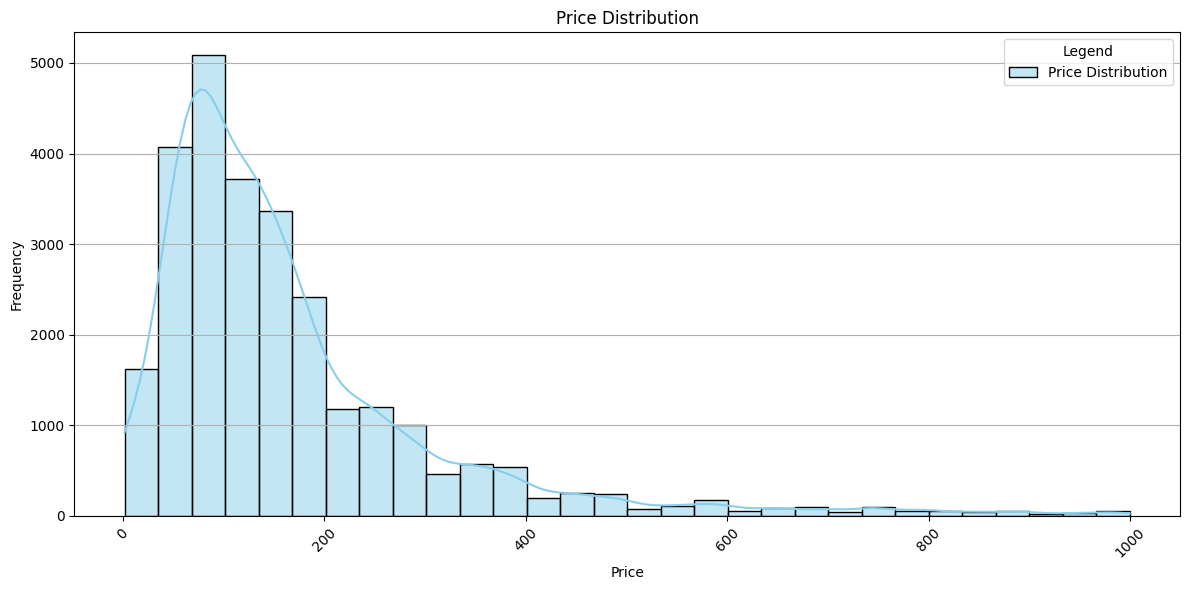

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=30, kde=True, color='skyblue', label='Price Distribution')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Legend')
plt.show()

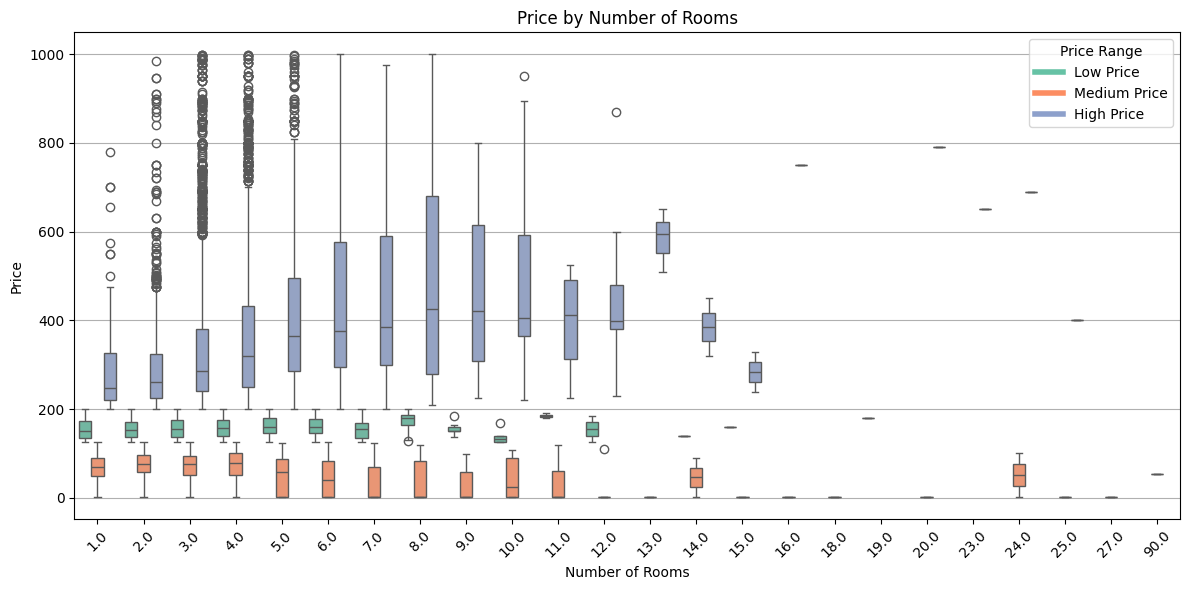

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rooms', y='price', data=data,  hue='price_category', palette='Set2', dodge=True)
plt.title('Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

def price_category(price):
  if price < data['price'].median():
    return 'Low Price'
  elif price < data['price'].quantile(0.75):
    return 'Medium Price'
  else:
    return 'High Price'

data['price_category'] = data['price'].apply(price_category)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in sns.color_palette('Set2', 3)]
labels = ['Low Price', 'Medium Price', 'High Price']  # Customize labels as needed
plt.legend(handles, labels, title='Price Range', loc='upper right')
plt.show()


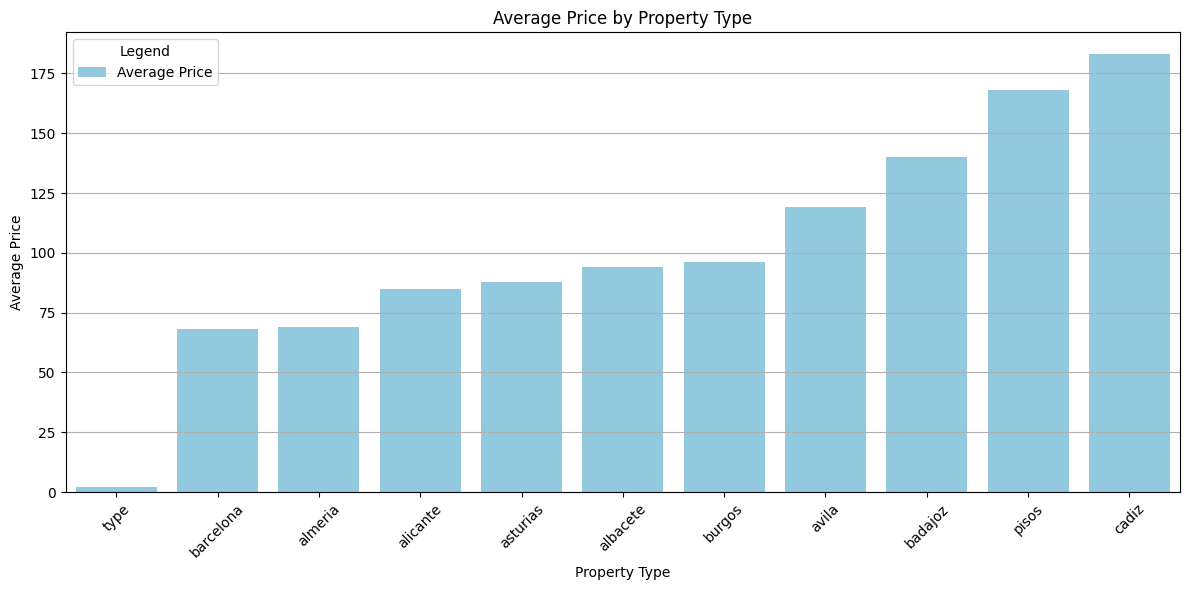

In [41]:
plt.figure(figsize=(12, 6))
average_price_by_type = data.groupby('type')['price'].mean().sort_values()
sns.barplot(x=average_price_by_type.index, y=average_price_by_type.values, color='skyblue', label='Average Price')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Legend')
plt.show()
